# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Find-distance-between-two-points" data-toc-modified-id="Find-distance-between-two-points-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Find distance between two points</a></div><div class="lev1 toc-item"><a href="#Find-distance-between-two-points-constrained-by-another-vector" data-toc-modified-id="Find-distance-between-two-points-constrained-by-another-vector-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Find distance between two points constrained by another vector</a></div><div class="lev1 toc-item"><a href="#Find-distance-between-large-number-of-points-in-for-loop" data-toc-modified-id="Find-distance-between-large-number-of-points-in-for-loop-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Find distance between large number of points in for loop</a></div><div class="lev2 toc-item"><a href="#Efficency-by-spatial-indexing" data-toc-modified-id="Efficency-by-spatial-indexing-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Efficency by spatial indexing</a></div>

# Find distance between two points

1. Data from openstreetmap
1. Status of open data on Indian [roads](https://www.openstreetmap.org/user/naveenpf/diary/44970)

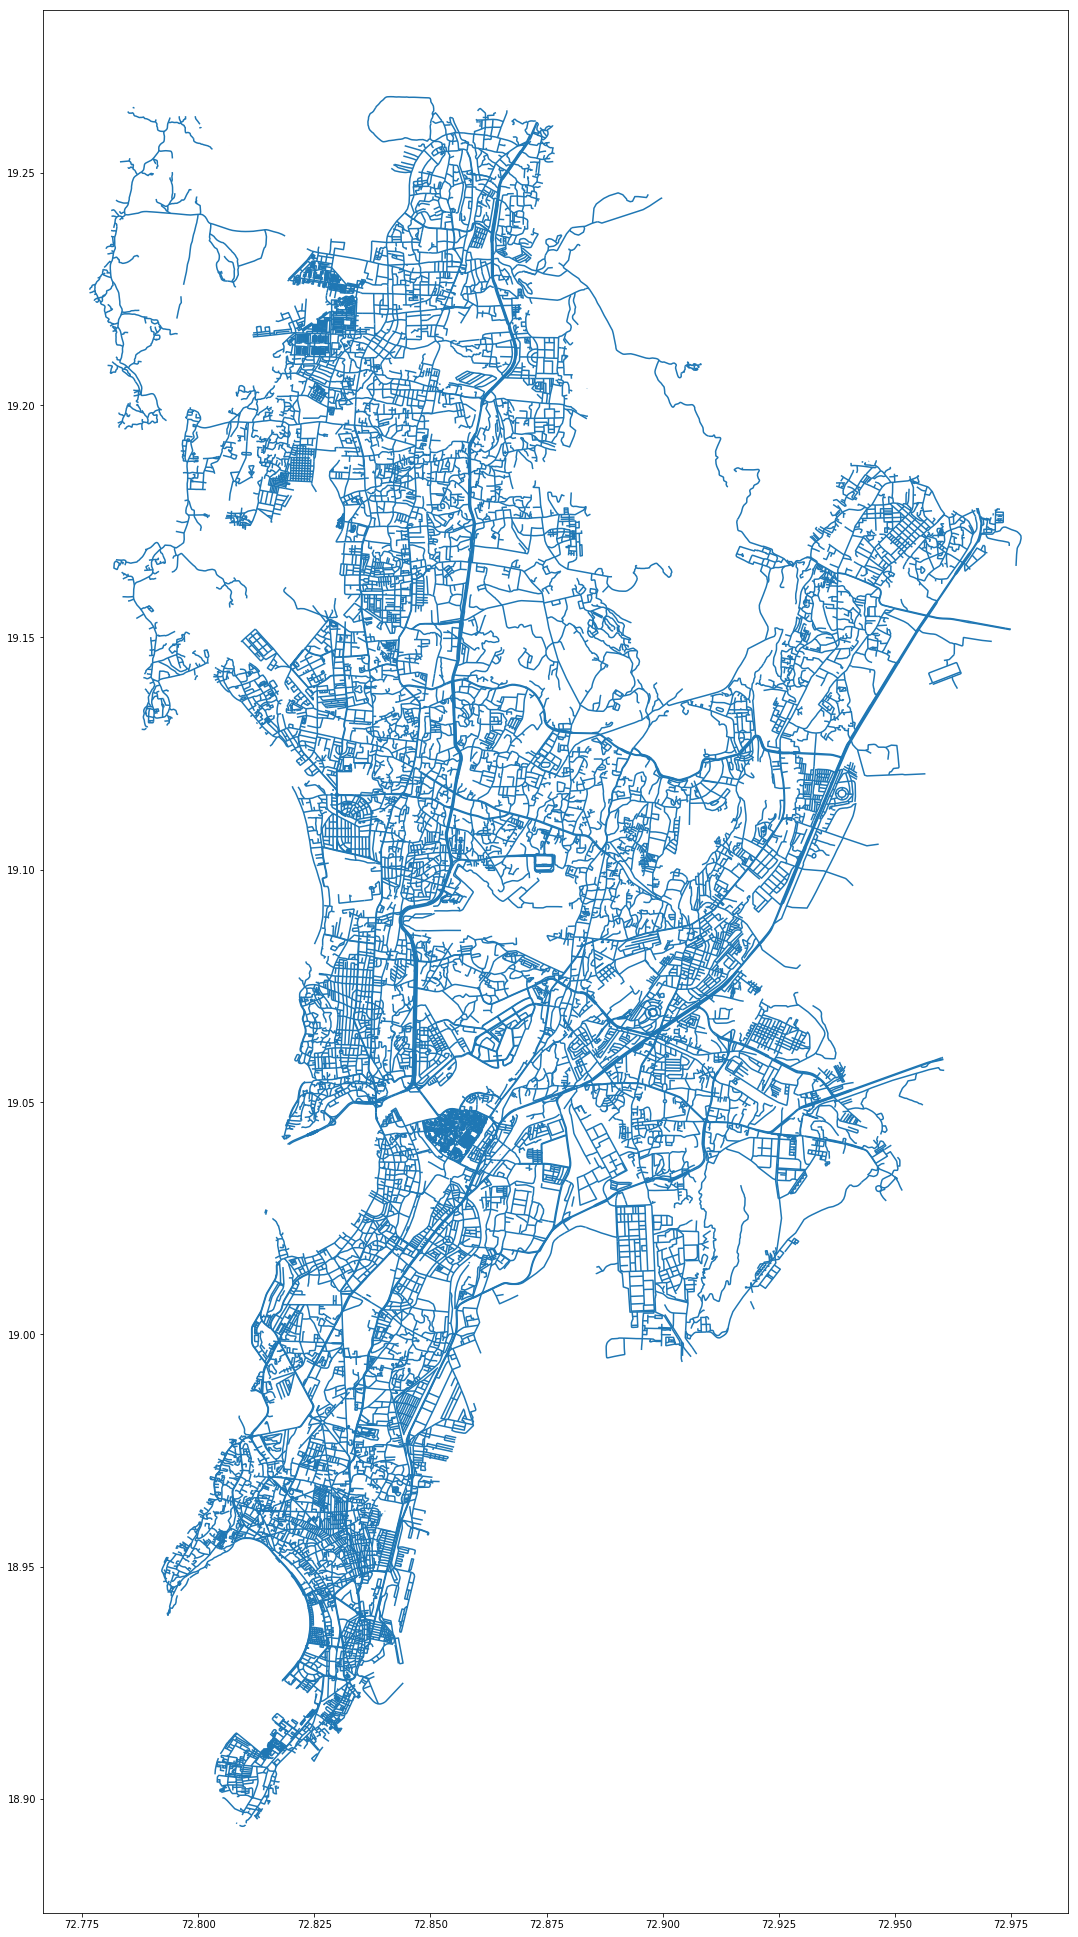

In [1]:
%matplotlib inline
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 35]

qq=gp.read_file('../data/vector/Mumbai_roads.geojson')
qq.plot()

In [2]:
qq['length']=qq.apply(lambda row: row['geometry'].length*100, axis=1)

In [6]:
qq.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 14 columns):
bridge      16382 non-null object
code        16382 non-null int64
fclass      16382 non-null object
gid         16382 non-null int64
layer       16382 non-null int64
maxspeed    16382 non-null int64
name        4188 non-null object
name_2      16382 non-null object
oneway      16382 non-null object
osm_id      16382 non-null object
ref         248 non-null object
tunnel      16382 non-null object
geometry    16382 non-null object
length      16382 non-null float64
dtypes: float64(1), int64(4), object(9)
memory usage: 1.7+ MB


In [8]:
qq.head()

bridge  code        fclass  gid  layer  maxspeed  \
0      F  5155         steps    1      0         0   
1      F  5121  unclassified    1      0         0   
2      F  5141       service    1      0         0   
3      F  5155         steps    1      0         0   
4      F  5141       service    1      0         0   

                                  name name_2 oneway    osm_id   ref tunnel  \
0                                 None      A      B  48742804  None      F   
1  ML Dahanukar Road (Carmichael Road)      A      B  48743003  None      F   
2                                 None      A      B  48743004  None      F   
3                                 None      A      B  48743005  None      F   
4                                 None      A      B  48743259  None      F   

                                            geometry    length  
0  LINESTRING (72.80979910000001 18.9747359, 72.8...  0.027033  
1  LINESTRING (72.81118189999999 18.9741288, 72.8...  0.502083  
2  LINESTRING (72.81082790000001 18.9740274, 72.8...  0.036824  
3  LINESTRING (72.81060119999999 18.9739865, 72.8...  0.023036  
4  LINESTRING (72.8108268 18.9726421, 72.8109601 ...  0.107069

# Find distance between two points constrained by another vector

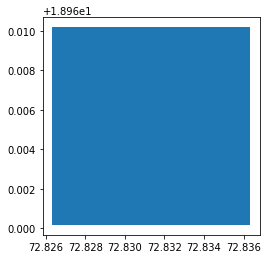

In [11]:
# fig=plt.figure(figsize=(48, 46), dpi= 80, facecolor='r', edgecolor='k')
poly=gp.read_file('../data/vector/Mumbai_grid_1km.geojson')
poly1=poly[poly['VIL']==220]
poly1.plot()

In [12]:
poly1

VIL                                           geometry
220  220  POLYGON ((72.8263329515335 18.97017666777769, ...

In [13]:
%%time
data = []
for index, orig in poly1.iterrows():
    for index2, ref in qq.iterrows():      
        if ref['geometry'].intersects(orig['geometry']): 
            owdspd=orig['VIL']
            data.append({'geometry':ref['geometry'].intersection(orig['geometry']),'wdspd':owdspd})

CPU times: user 1.79 s, sys: 2.05 ms, total: 1.8 s
Wall time: 1.84 s


In [14]:
data1=pd.DataFrame(data)
data2 = gp.GeoDataFrame(data1, geometry='geometry')
#data2.to_file('../data/vector/test.geojson', driver="GeoJSON")
#data2.plot()

In [16]:
data2.head()

geometry  wdspd
0  LINESTRING (72.82721739999999 18.961683, 72.82...    220
1  LINESTRING (72.82759729999999 18.9629686, 72.8...    220
2  LINESTRING (72.8274995 18.967083, 72.827576699...    220
3  LINESTRING (72.8297788 18.9637874, 72.83025000...    220
4  LINESTRING (72.8265799 18.9626477, 72.82657829...    220

#  Find distance between large number of points in for loop

In [17]:
grids=[206,207,208,243,244,245,246,247,248]
poly2=poly[poly['VIL'].isin(grids)]
#poly2

In [18]:
%%time
data = []
for index, orig in poly2.iterrows():
    for index2, ref in qq.iterrows():      
        if ref['geometry'].intersects(orig['geometry']): 
            owdspd=orig['VIL']
            data.append({'geometry':ref['geometry'].intersection(orig['geometry']),'wdspd':owdspd})

CPU times: user 15.4 s, sys: 6.82 ms, total: 15.4 s
Wall time: 15.9 s


## Efficency by spatial indexing

1. using spatial [indexing](https://gis.stackexchange.com/questions/120955/understanding-use-of-spatial-indexes-with-rtree)

In [19]:
import geopandas as gp
qq=gp.read_file('../data/vector/Mumbai_grid_1km.geojson')

qq.to_file('../data/vector/Mumbai_grid_1km.shp', driver='ESRI Shapefile')

rr=gp.read_file('../data/vector/Mumbai_roads.geojson')

rr.to_file('../data/vector/Mumbai_roads.shp', driver='ESRI Shapefile')

In [20]:
%%time
import fiona
from shapely.geometry import shape, mapping
import rtree


def intersect(boundarySHP,roadSHP,outSHP):
    with fiona.open(boundarySHP, 'r') as layer1:
        with fiona.open(roadSHP, 'r') as layer2:
        # We copy schema and add the  new property for the new resulting shp
            schema = layer2.schema.copy()
            schema['properties']['gno'] = 'int:10'
            schema['properties']['length'] = 'float:15.2'
        # We open a first empty shp to write new content from both others shp
            with fiona.open(outSHP, 'w', 'ESRI Shapefile', schema) as layer3:
                index = rtree.index.Index()
                for feat1 in layer1:
                    fid = int(feat1['id'])
                    geom1 = shape(feat1['geometry'])
                    index.insert(fid, geom1.bounds)
                for feat2 in layer2:
                    geom2 = shape(feat2['geometry'])
                    for fid in list(index.intersection(geom2.bounds)):
                        if fid != int(feat2['id']):
                            feat1 = layer1[fid]
                            geom1 = shape(feat1['geometry'])
                            if geom1.intersects(geom2):
                                # We take attributes from ctSHP
                                props = feat2['properties']
                                # Then append the uid attribute we want from the other shp
                                geom3=geom1.intersection(geom2)
                                if geom3.geom_type=='GeometryCollection':
                                    print("empty geometry")
                                elif geom3.geom_type=='Point':
                                    print(props)
                                else:
                                    props['gno'] = feat1['properties']['VIL']
                                    props['length']=geom3.length*100
                                    layer3.write({
                                    'properties': props,
                                    'geometry': mapping(geom1.intersection(geom2))
                                    })
                                    

outSHP='../data/vector/results.shp'
boundarySHP='../data/vector/Mumbai_grid_1km.shp'
roadSHP='../data/vector/Mumbai_roads.shp'

intersect(boundarySHP,roadSHP,outSHP)

CPU times: user 25.2 s, sys: 399 ms, total: 25.6 s
Wall time: 26.4 s


In [23]:
gp.read_file('../data/vector/results.shp')

bridge  code         fclass  gid  layer  maxspeed  \
0          F  5155          steps    1      0         0   
1          F  5121   unclassified    1      0         0   
2          F  5141        service    1      0         0   
3          F  5155          steps    1      0         0   
4          F  5141        service    1      0         0   
5          F  5141        service    1      0         0   
6          F  5121   unclassified    1      0         0   
7          T  5113        primary    1      1         0   
8          F  5114      secondary    1      0         0   
9          F  5122    residential    1      0         0   
10         F  5121   unclassified    1      0         0   
11         F  5141        service    1      0         0   
12         F  5123  living_street    1      0         0   
13         F  5141        service    1      0         0   
14         F  5123  living_street    1      0         0   
15         F  5123  living_street    1      0         0   
16         F  5123  living_street    1      0         0   
17         F  5121   unclassified    1      0         0   
18         F  5141        service    1      0         0   
19         F  5141        service    1      0         0   
20         F  5121   unclassified    1      0         0   
21         F  5121   unclassified    1      0         0   
22         F  5121   unclassified    1      0         0   
23         F  5121   unclassified    1      0         0   
24         F  5155          steps    1      0         0   
25         F  5115       tertiary    1      0         0   
26         F  5115       tertiary    1      0         0   
27         F  5141        service    1      0         0   
28         F  5141        service    1      0         0   
29         T  5153        footway    1      1         0   
...      ...   ...            ...  ...    ...       ...   
20686      F  5122    residential    1      0         0   
20687      F  5122    residential    1      0         0   
20688      F  5122    residential    1      0         0   
20689      F  5122    residential    1      0         0   
20690      F  5122    residential    1      0         0   
20691      F  5114      secondary    1      0         0   
20692      F  5115       tertiary    1      0         0   
20693      F  5122    residential    1      0         0   
20694      F  5114      secondary    1      0        40   
20695      F  5114      secondary    1      0        40   
20696      F  5122    residential    1      0         0   
20697      F  5124     pedestrian    1      0         0   
20698      F  5122    residential    1      0         0   
20699      F  5122    residential    1      0         0   
20700      F  5141        service    1      0         0   
20701      F  5141        service    1      0         0   
20702      T  5114      secondary    1      1         0   
20703      F  5122    residential    1      0         0   
20704      T  5112          trunk    1      0         0   
20705      F  5122    residential    1      0         0   
20706      F  5122    residential    1      0         0   
20707      F  5122    residential    1      0         0   
20708      F  5122    residential    1      0         0   
20709      F  5122    residential    1      0         0   
20710      F  5122    residential    1      0         0   
20711      F  5122    residential    1      0         0   
20712      F  5122    residential    1      0         0   
20713      F  5122    residential    1      0         0   
20714      F  5122    residential    1      0         0   
20715      F  5122    residential    1      0         0   

                                          name name_2 oneway     osm_id   ref  \
0                                         None      A      B   48742804  None   
1          ML Dahanukar Road (Carmichael Road)      A      B   48743003  None   
2                                         None      A      B   48743004  None   
3                      

In [ ]:
from IPython.display import SVG, display
def show_svg():
    display(SVG('untitled.svg'))
show_svg()